<a href="https://colab.research.google.com/github/KONDAIAHGARISHANTHAN/Machine-Learning-and-NLP-Projects/blob/main/Restaurant_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
df.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [9]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [12]:
df.duplicated().sum()

4

In [13]:
df.drop_duplicates()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [15]:
df.reset_index(inplace=True)

In [16]:
df.head(5)

,index,Review,Liked
0,0,Wow... Loved this place.,1
1,1,Crust is not good.,0
2,2,Not tasty and the texture was just nasty.,0
3,3,Stopped by during the late May bank holiday of...,1
4,4,The selection on the menu was great and so wer...,1


In [ ]:
df.drop('index',axis='columns')

In [19]:
df['Review'][0]

'Wow... Loved this place.'

In [20]:
import re
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip().lower()

In [25]:
df['modified_review']=df['Review'].map(preprocess)
df.head(5)

,index,Review,Liked,modified_review
0,0,Wow... Loved this place.,1,wow loved this place
1,1,Crust is not good.,0,crust is not good
2,2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.modified_review,
    df.Liked,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Liked
)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.79      0.81      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[79, 21],
       [19, 81]])

Text(95.72222222222221, 0.5, 'Truth')

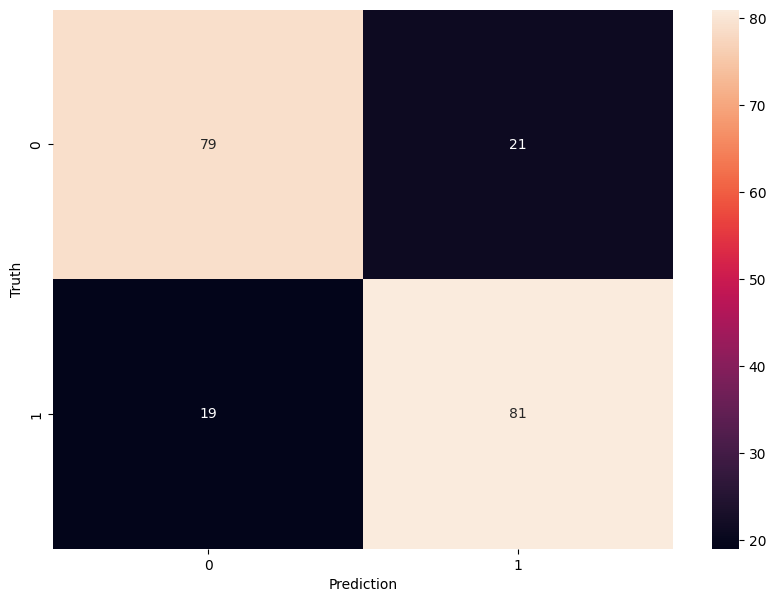

In [38]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
!python -m spacy download en_core_web_lg

In [49]:
# Assuming clf is your classifier and you want to predict the class of a single text string
text_to_predict = ['pavankalyan is good']  # Put the string inside a list

y_pred = clf.predict(text_to_predict)
print(y_pred)


[1]


In [52]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [54]:
df['vector'] = df['modified_review'].apply(lambda text: nlp(text).vector)
df.head(5)

,index,Review,Liked,modified_review,vector
0,0,Wow... Loved this place.,1,wow loved this place,"[0.7318075, 0.755225, -1.65873, -2.0085425, 2...."
1,1,Crust is not good.,0,crust is not good,"[-0.42372248, 2.257175, -2.715025, 0.22242002,..."
2,2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,"[-2.8221874, 0.17256287, -1.3582325, -0.080463..."
3,3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,"[-2.385407, -0.1268905, -2.374992, 0.31999797,..."
4,4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,"[-3.6586578, -0.8830164, -2.604255, 0.5351799,..."


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.Liked,
    test_size=0.2,
    random_state=2022
)

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [64]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       100
           1       0.67      0.66      0.67       100

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200



In [65]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       100
           1       0.63      0.62      0.62       100

    accuracy                           0.62       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.63      0.62      0.62       200

